In [1]:
# # load default number img data
# from keras.datasets.mnist import load_data
# #((x_train, y_train), (x_test, y_test))
# (x_train, y_train), (x_test, y_test) = load_data()

In [6]:
from keras.datasets import fashion_mnist
# load 衣服版本
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [7]:
# display data dim
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


2


E:\python\venv\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


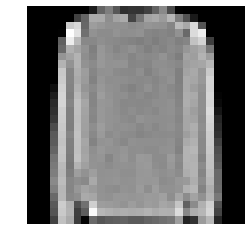

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [9]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,29,100,...,75,2,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,66,100,171,170,...,182,127,83,26,0,0,0,0,0,0
2,0,0,0,0,0,203,216,103,157,151,...,133,186,169,217,84,0,0,0,0,0
3,0,0,0,0,2,255,226,112,146,140,...,130,146,106,219,237,0,0,0,0,0
4,0,0,0,0,96,237,186,136,136,143,...,137,128,133,194,212,62,0,0,0,0
5,0,0,0,0,106,176,163,146,127,151,...,139,134,151,161,171,118,0,0,0,0
6,0,0,0,0,149,164,179,142,131,152,...,136,126,164,158,180,157,0,0,0,0
7,0,0,0,0,180,148,180,146,139,152,...,140,136,158,163,166,183,0,0,0,0
8,0,0,0,0,200,134,174,157,134,145,...,143,128,163,169,151,201,0,0,0,0
9,0,0,0,0,203,133,170,155,130,149,...,146,128,170,166,152,212,0,0,0,0


In [10]:
# 資料處理
# 1. 圖片部分 
# 把你圖轉成 0 - 1
# MLP的輸入必須是一維, 必須把她拉平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [11]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前:", y_train[0])
print("處理後:", y_train_cat[0])

處理前: 9
處理後: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(256, input_dim=784, activation="relu"))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 2. 確定你梯度下降所用的參數
# loss 一個神經元: binary_crossentropy 兩個以上神經元: categorical_crossentropy
# (補充) 回歸 神經元 acitvation不帶入, loss="mse"
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# 3. 訓練!!!!
# batch_size: 看幾筆調整一次W
# epochs: 整個資料集總共看幾次
# batch = 200, epochs = 10: 60000 * 10 / 200 = 3000次梯度調整
# fit到什麼時候為止呢? val_loss開始平緩就停下來
mlp.fit(x_train_shape, y_train_cat, batch_size=200, epochs=5, validation_split=0.1, verbose=2)
# 再run 會直接接下去

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 1s - loss: 0.5584 - acc: 0.8089 - val_loss: 0.4235 - val_acc: 0.8463
Epoch 2/5
 - 1s - loss: 0.4063 - acc: 0.8585 - val_loss: 0.3876 - val_acc: 0.8603
Epoch 3/5
 - 1s - loss: 0.3645 - acc: 0.8716 - val_loss: 0.3588 - val_acc: 0.8667
Epoch 4/5
 - 1s - loss: 0.3368 - acc: 0.8791 - val_loss: 0.3890 - val_acc: 0.8627
Epoch 5/5
 - 1s - loss: 0.3163 - acc: 0.8864 - val_loss: 0.3884 - val_acc: 0.8575


In [15]:
# 不用再自己accuracy_score, 你可以使用evaluate
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 15us/step


[0.4164078535795212, 0.8529]

In [16]:
from sklearn.metrics import confusion_matrix
# 混淆舉證
pre = mlp.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,859,0,42,32,4,2,51,0,10,0
1,3,963,1,28,2,0,1,0,2,0
2,11,0,922,8,40,0,18,0,1,0
3,32,7,33,881,34,2,8,0,3,0
4,0,0,301,29,653,1,13,0,3,0
5,0,0,0,0,0,965,0,23,2,10
6,180,1,250,29,97,1,428,0,14,0
7,0,0,0,0,0,31,0,944,0,25
8,3,1,11,6,5,4,3,5,962,0
9,0,0,0,0,0,12,1,35,0,952


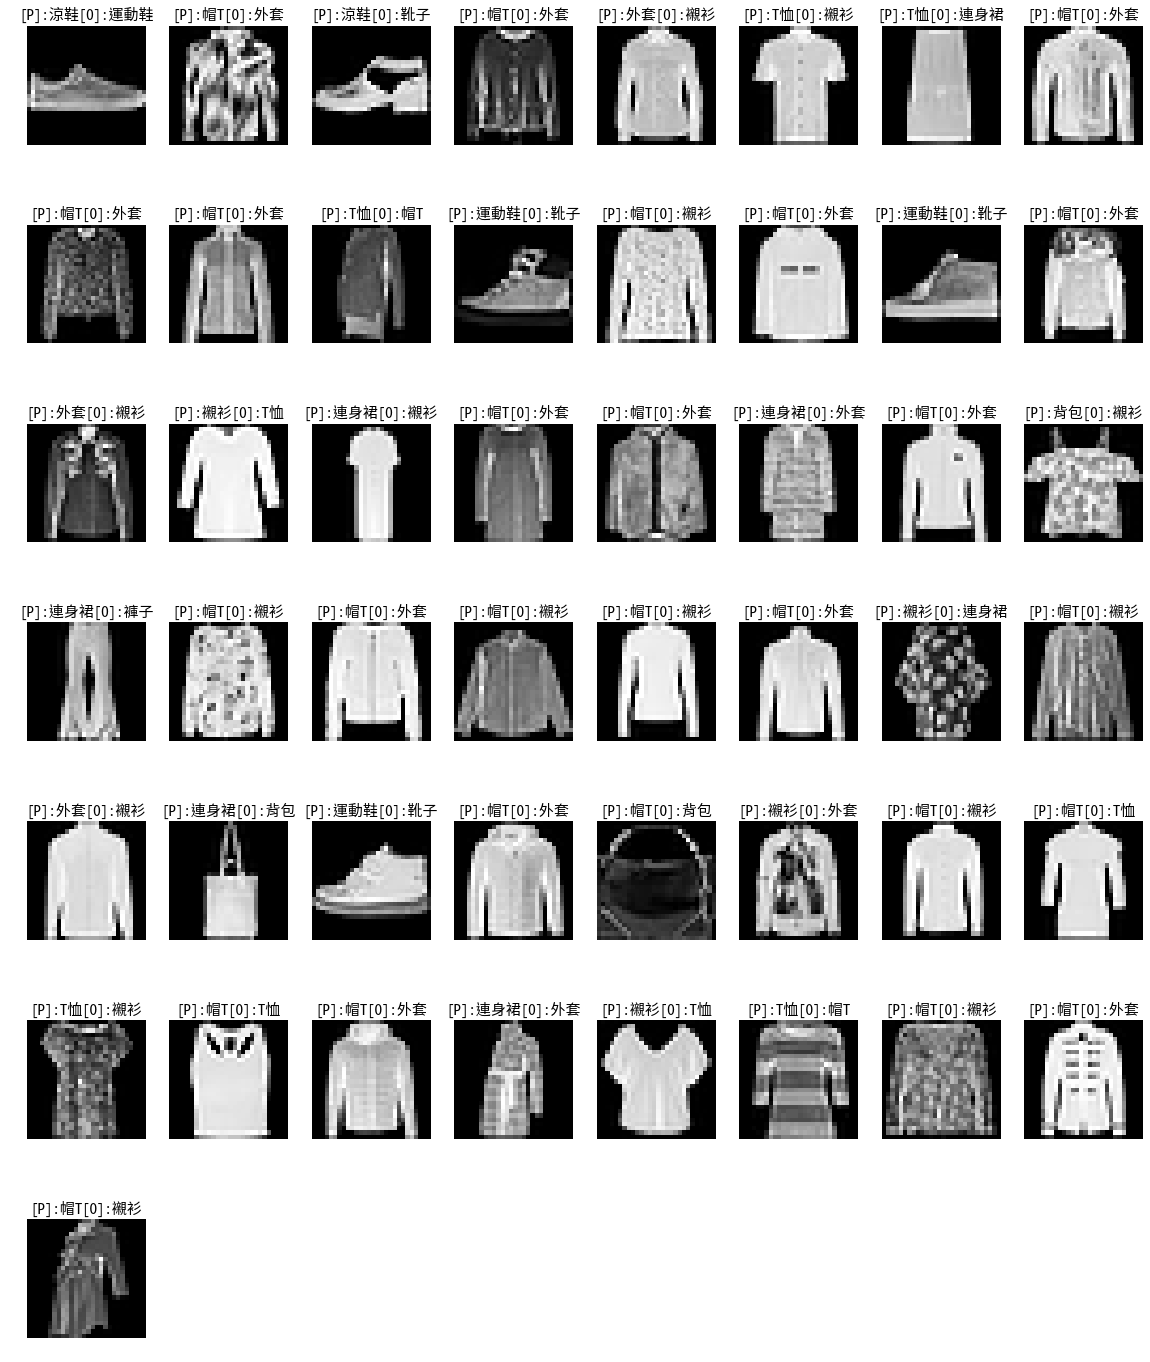

In [36]:
import numpy as np
import matplotlib
from matplotlib.font_manager import *
import matplotlib.pyplot as plt
myfont = FontProperties(fname='E:/fonts/NotoSansMonoCJKtc-Regular.otf')
# plt.rcParams['axes.unicode_minus']=False
idxs = np.nonzero(pre != y_test)[0]
idxs = idxs[1:50]
label_item = ["T恤", "褲子", "帽T", "連身裙", "外套", "涼鞋", "襯衫", "運動鞋" , "背包", "靴子"]
# 繪製比較圖
# ["a", "b", "c"]
# for in : a -> b -> c
# for in enumerate : (0, a) -> (1, b) -> (2, c)
plt.figure(figsize=(20, 25))
width = 8
height = int(len(idxs) / width) + 1
falsepre = pre[idxs]
falseori = y_test[idxs]
for (i, img) in enumerate(x_test[idxs]):
    plt.subplot(height, width, i + 1)
    t = "[P]:" + label_item[falsepre[i]] + "[O]:" + label_item[falseori[i]]
    plt.title(t, fontproperties=myfont,size = 15)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [42]:
# 兩大圖像處理函式庫(PIL, opencv)
# PIL幫我安裝Pillow
# !!! 再用的時候所有東西都轉成np array
from PIL import Image
# f = input("請輸入檔名:")
f ="E:/python/test01.png"
# f = open(fn, "rb") pil 會幫開
oriimg = Image.open(f).convert("L")
img = oriimg.resize((28, 28))
img_shape = np.array(img).reshape(784) / 255
result = mlp.predict_classes(np.array([img_shape]))
print("預測結果:", label_item[restult])
oriimg

NameError: name 'restult' is not defined